In [2]:
import cv2
#import requests

import glob
import numpy as np
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import matplotlib.pyplot as plt

#import random
#import torch

In [3]:
import sys
print(sys.executable)

d:\Studying\GraduationThesis\venv\Scripts\python.exe


In [10]:

#Defind 2 URL of video for dataset
# List các video
video_drunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day1"
video_undrunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day1"
images_path = "D:\\Studying\\GraduationThesis\\Data\\Images\\Day1"
# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk"
images_drunk = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1"
images_undrunk = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1"

train_undrunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\train_undrunk"
train_drunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\train_drunk"
test_undrunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\test_undrunk"
test_drunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\test_drunk"

# Đường dẫn tới thư mục train và test
train_path = "D:\\Studying\\GraduationThesis\\data\\train_data"
test_path = "D:\\Studying\\GraduationThesis\\data\\test_data"



In [1]:
def convert_video_to_images(video_path, images_path, video_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Không thể mở video: {video_path}")
        return

    os.makedirs(images_path, exist_ok=True)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration_seconds = frame_count / fps

    frame_number = 0
    current_second = 0
    count = 1  

    while cap.isOpened() and current_second <= duration_seconds:
        ret, frame = cap.read()
        if ret:
            current_second = frame_number / fps        
            frame_number += 1
            # Lưu một frame từ video mỗi giây
            if frame_number % fps == 0:
                frame_filename = os.path.join(images_path, f'{video_name}_{count}.jpg')
                cv2.imwrite(frame_filename, frame)
                count += 1  # Tăng count lên 1 sau khi lưu hình ảnh
            
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
            





In [68]:

# def for_videos_to_images(videos_directory, images_directory):
#     # Liệt kê tất cả các tệp trong thư mục video
#     for root, dirs, files in os.walk(videos_directory):
#         for file in files:
#             # Kiểm tra xem tệp có phải là video không
#             if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
#                 video_path = os.path.join(root, file)
#                 try : 
#                     convert_video_to_images(video_path, images_directory,1)
#                 except Exception  as e:
#                     print(f"Lỗi khi xử lý video {video_path}: {e}")
def for_videos_to_images(videos_directory, images_directory):
    # Liệt kê tất cả các tệp trong thư mục video
    for root, dirs, files in os.walk(videos_directory):
        for file in files:
            # Kiểm tra xem tệp có phải là video không
            if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
                video_path = os.path.join(root, file)
                video_name = os.path.splitext(file)[0]  # Tên video (không bao gồm phần mở rộng)
                #images_directory_for_video = os.path.join(images_directory, video_name)  # Thư mục lưu trữ hình ảnh cho video tương ứng
                #os.makedirs(images_directory_for_video, exist_ok=True)  # Tạo thư mục lưu trữ hình ảnh nếu chưa tồn tại
                try:
                    convert_video_to_images(video_path, images_directory, video_name)
                except Exception as e:
                    print(f"Lỗi khi xử lý video {video_path}: {e}")



In [69]:
# Chuyển đổi từng video undrunk trong danh sách
for_videos_to_images(video_drunk_path,images_drunk)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [70]:
import os
import shutil
from sklearn.model_selection import train_test_split



# Tách dữ liệu thành tập train và tập test
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(train_path, "train_drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(test_path, "test_drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(train_path, "train_undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(test_path, "test_undrunk", image))

print("Tách dữ liệu thành công!")


Tách dữ liệu thành công!


In [11]:
image_size = 128

In [9]:
images_name = []
def train_data():
    train_data_undunk = [] 
    train_data_drunk=[]

    for image1 in tqdm(os.listdir(train_drunk)): 
        path = os.path.join(train_drunk, image1)
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)   
        images_name.append(image1)      
        img1 = cv2.imread(path)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(train_undrunk)): 
        path = os.path.join(train_undrunk, image2)
        images_name.append(image2)
        img2 = cv2.imread(path)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_undunk.append(img2) 
    train_data= np.concatenate((np.asarray(train_data_drunk),np.asarray(train_data_undunk)),axis=0)
    return train_data

In [12]:

train_data = train_data()

100%|██████████| 69/69 [00:00<00:00, 116.16it/s]


In [13]:
def test_data():
    test_data_drunk = [] 
    test_data_undrunk=[]
    for image1 in tqdm(os.listdir(test_drunk)): 
        path = os.path.join(test_drunk, image1)
        images_name.append(image1)    
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)        
        img1 = cv2.imread(path)     
        img1 = cv2.resize(img1, (image_size, image_size))  
        test_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(test_undrunk)): 
        images_name.append(image2)    
        path = os.path.join(test_undrunk, image2)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)       
        img2 = cv2.imread(path)   
        img2 = cv2.resize(img2, (image_size, image_size))    
        test_data_undrunk.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_drunk),np.asarray(test_data_undrunk)),axis=0) 
    return test_data 

In [14]:
test_data  = test_data() 

100%|██████████| 18/18 [00:00<00:00, 125.87it/s]


In [15]:
# Kết hợp train_data và test_data thành một mảng x_data
x_data=np.concatenate((train_data,test_data),axis=0)
# Chuẩn hóa dữ liệu trong mảng x_data để giữ cho các giá trị nằm trong khoảng từ 0 đến 1
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [16]:
# Tạo mảng chứa 96 phần tử 0 và 96 phần tử 1 cho Y_train
z1 = np.zeros(69)
o1 = np.ones(100)
Y_train = np.concatenate((o1, z1), axis=0)

# Tạo mảng chứa 10 phần tử 0 và 10 phần tử 1 cho Y_test
z = np.zeros(18)
o = np.ones(25)
Y_test = np.concatenate((o, z), axis=0)

In [17]:

# Tạo mảng y_data bằng cách kết hợp Y_train và Y_test, sau đó thay đổi hình dạng
y_data = np.concatenate((Y_train, Y_test), axis=0).reshape(x_data.shape[0], 1)


In [18]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128, 3)
Y shape:  (212, 1)


In [19]:
from sklearn.model_selection import train_test_split

# Sử dụng train_test_split để chia dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Số lượng mẫu trong tập train và tập test
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

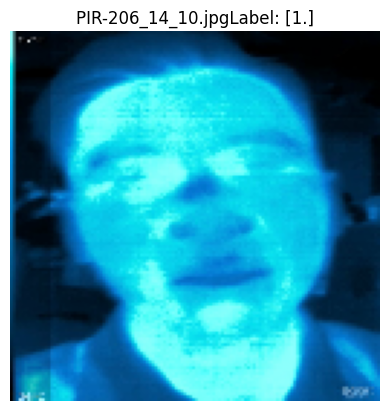

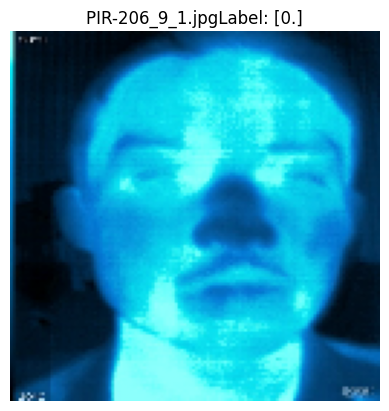

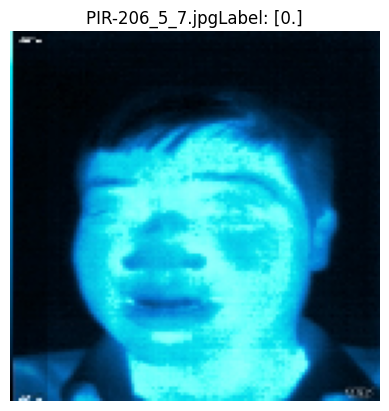

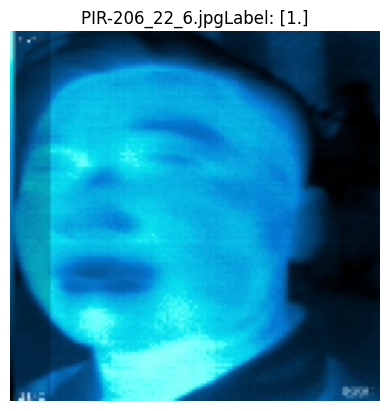

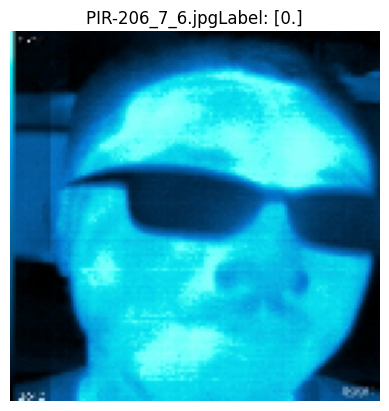

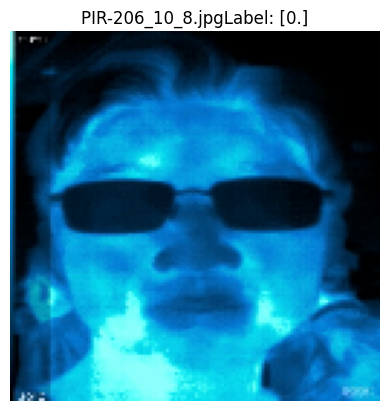

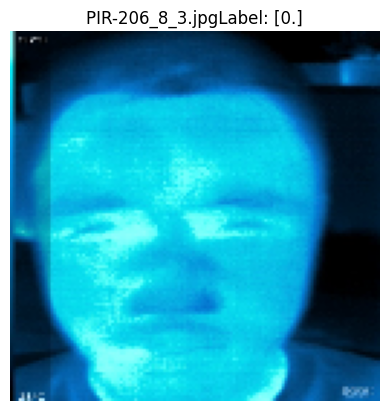

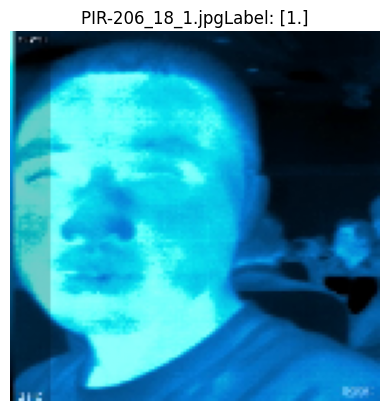

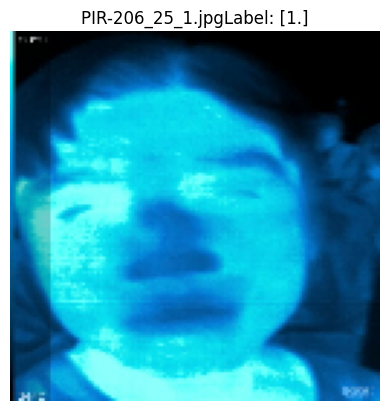

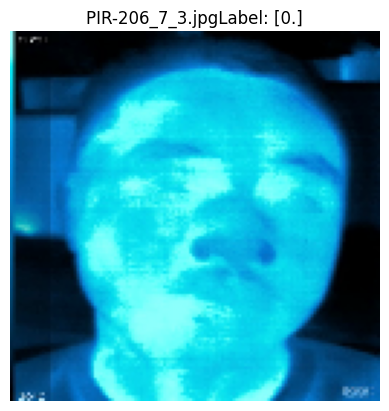

In [20]:

import numpy as np

# Tạo danh sách chứa tên của các hình ảnh
#image_names = [os.path.basename(image_path) for image_path in image_paths]
# Chọn và hiển thị 10 hình ảnh ngẫu nhiên từ tập dữ liệu
for _ in range(10):
    index = np.random.randint(0, x_data.shape[0])  # Chọn một chỉ số ngẫu nhiên từ 0 đến số lượng hình ảnh - 1
    random_image = x_data[index]  # Lấy hình ảnh tương ứng với chỉ số ngẫu nhiên
    name = images_name[index]
    # In hình ảnh ra màn hình
    plt.imshow(random_image)
    plt.title(name + 'Label: ' + str(y_data[index]))  # In nhãn của hình ảnh
    plt.axis('off')  # Ẩn các trục
    plt.show()


In [21]:
# Chuyển đổi mỗi mảng hình ảnh trong x_train và x_test từ dạng ba chiều sang dạng một chiều
#Mô hình Logistic Regression thường mong đợi đầu vào ở dạng một vector, 
#do đó việc chuyển đổi từ mảng 3 chiều sang mảng 1 chiều là bước cần thiết để đưa dữ liệu vào mô hình này.
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

# In hình dạng của các mảng đã chuyển đổi
print("X train flatten:", x_train_flatten.shape)
print("X test flatten:", x_test_flatten.shape)


X train flatten: (169, 49152)
X test flatten: (43, 49152)


In [22]:
# Chuyển vị các mảng x_train_flatten, x_test_flatten, y_train, và y_test
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T

# In hình dạng của các mảng sau khi chuyển vị
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (49152, 169)
x test:  (49152, 43)
y train:  (1, 169)
y test:  (1, 43)


In [55]:
import matplotlib.pyplot as plt
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    #Xác định số chiều của dữ liệu đầu vào bằng cách lấy kích thước của chiều đầu tiên của x_train.
    dimension =  x_train.shape[0]
    # Khởi tạo trọng số và bias ban đầu bằng cách sử dụng hàm initialize_weights_and_bias với số chiều của dữ liệu.
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: 0.036571
Cost after iteration 300: 0.011518
Cost after iteration 400: 0.007079
Cost after iteration 500: 0.005412
Cost after iteration 600: 0.004527
Cost after iteration 700: 0.003962
Cost after iteration 800: 0.003560
Cost after iteration 900: 0.003256
Cost after iteration 1000: 0.003015
Cost after iteration 1100: 0.002818
Cost after iteration 1200: 0.002653
Cost after iteration 1300: 0.002513
Cost after iteration 1400: 0.002391
Cost after iteration 1500: 0.002285
Cost after iteration 1600: 0.002190
Cost after iteration 1700: 0.002106
Cost after iteration 1800: 0.002029
Cost after iteration 1900: 0.001959


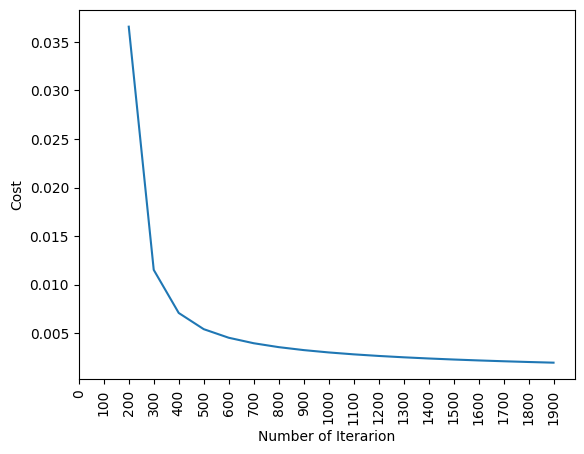

Test Accuracy: 95.35 %
Train Accuracy: 100.0 %


In [62]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.008, num_iterations = 2000)

In [23]:
# Hyperparameter Tunning: GridSearcCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression, grid, cv=10)
log_reg_cv.fit(x_train.T, y_train.T)


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [24]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
accuracy:  0.9705882352941178


In [25]:
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 1.0 


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 1.0 


In [94]:
def preprocess_image(image):
    # Resize hình ảnh về kích thước phù hợp với đầu vào của mô hình
    resized_image = cv2.resize(image, (image_size, image_size))  # Thay width và height bằng kích thước đầu vào mong muốn
    # Làm phẳng hình ảnh thành một mảng một chiều
    image_reshape = resized_image.flatten()
    # Reshape đầu ra thành một vector cột
    image_reshape = image_reshape.reshape(-1, 1)
    print(image_reshape.shape)
    return image_reshape.T

# Tiền xử lý hình ảnh mới
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_drunk\\PIR-206_16_9.jpg"
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_undrunk\\PIR-206_10_4.jpg" 
#path = "D:\\Studying\\GraduationThesis\\test\\drunk\\test_drunk_2.jpg"     
#path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\test_undrunk_8.jpg"     
path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg" 

img = cv2.imread(path)     
new_image = preprocess_image(img)
# Dự đoán nhãn của một hình ảnh từ đường dẫn
predicted_proba  = log_reg_cv.predict_proba(new_image)
predicted_label = log_reg_cv.predict(new_image)

# Hiển thị phần trăm của từng lớp
classes = log_reg_cv.classes_ 
for i, class_name in enumerate(classes):
    print(f"Probability of class '{class_name}': {predicted_proba [0][i] * 100:.2f}%")
print("Predicted label:", predicted_label)


(49152, 1)
Probability of class '0.0': 0.00%
Probability of class '1.0': 100.00%
Predicted label: [1.]


In [95]:
test_path_drunk = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2\\PIR-206_38.mov"
test_path_undrunk = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2\\PIR-206_33.mov"
path_save_drunk = "D:\\Studying\\GraduationThesis\\test\\drunk\\2"
path_save_undrunk = "D:\\Studying\\GraduationThesis\\test\\undrunk\\4"



In [32]:
# Test drunk
convert_video_to_images(test_path_drunk,path_save_drunk,"test_drunk")

In [96]:
#Test undrunk
convert_video_to_images(test_path_undrunk,path_save_undrunk,"test_undrunk")

In [77]:
def predict_proba_all_images(directory_path):
    image_paths = [os.path.join(directory_path, image) for image in os.listdir(directory_path)]
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        # Làm phẳng hình ảnh thành một mảng một chiều
        img = img.flatten()
        # Reshape đầu ra thành một vector cột
        img = img.reshape(-1, 1)        
        print(image_path)
        # Dự đoán xác suất thuộc mỗi lớp
        predicted_label = log_reg_cv.predict(img.T)
        print("Predicted label:", predicted_label)

In [97]:
predict_proba_all_images(path_save_undrunk)

D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_1.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_2.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_3.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_4.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_5.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_6.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_7.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_8.jpg
Predicted label: [0.]


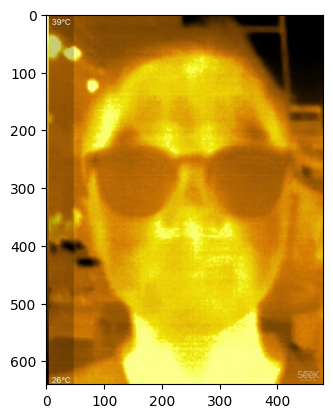

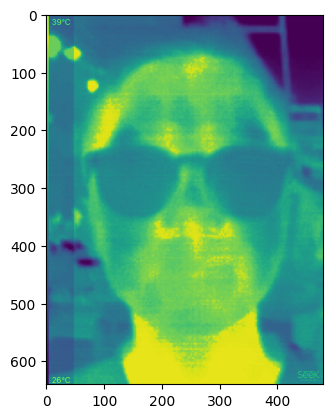

Temperature Histogram: [1.99511722e-02 3.84440110e-03 1.75781245e-03 2.01171869e-03
 1.40299473e-03 1.19140628e-03 1.18815107e-03 1.72851561e-03
 1.77734380e-03 1.31184899e-03 1.13932288e-03 8.23567680e-04
 1.16536464e-03 4.75260429e-04 5.89192729e-04 6.99869765e-04
 5.69661439e-04 1.13606767e-03 8.49609380e-04 6.64062507e-04
 5.53385413e-04 6.67317712e-04 6.83593738e-04 7.09635438e-04
 7.42187491e-04 7.03125028e-04 5.24088566e-04 3.77604156e-04
 4.32942703e-04 4.06901032e-04 4.45963553e-04 5.11067687e-04
 4.32942703e-04 4.88281250e-04 4.10156237e-04 3.93880211e-04
 5.79427055e-04 5.07812481e-04 5.72916644e-04 5.24088566e-04
 5.85937523e-04 4.75260429e-04 4.81770840e-04 5.40364592e-04
 5.56640618e-04 7.68229191e-04 6.93359354e-04 6.64062507e-04
 6.86848944e-04 6.11979165e-04 7.25911465e-04 7.71484396e-04
 7.71484396e-04 6.47786481e-04 6.44531276e-04 5.76171849e-04
 5.76171849e-04 6.44531276e-04 6.38020807e-04 6.47786481e-04
 7.61718722e-04 6.70572917e-04 4.68749990e-04 7.22656259e-04
 

In [6]:
import cv2
import numpy as np

def calculate_temperature_histogram(image):
    # Chuyển đổi không gian màu từ BGR sang RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    # Chuyển đổi ảnh sang không gian màu nhiệt độ
    temperature_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     # In hình ảnh ra màn hình
    plt.imshow(temperature_image)
    plt.show()
    # Tính toán histogram của các mức sáng nhiệt độ
    hist = cv2.calcHist([temperature_image], [0], None, [256], [0, 256])
    
    # Chuẩn hóa histogram
    hist /= np.sum(hist)
    
    return hist.flatten()

# Load ảnh
image_path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg"
image = cv2.imread(image_path)

# Tính toán histogram của các mức sáng nhiệt độ trên ảnh
temperature_hist = calculate_temperature_histogram(image)

# In histogram
print("Temperature Histogram:", temperature_hist)

In [ ]:


# Đường dẫn đến pre-trained Haar Cascade Classifier
cascade_path = "path_to_haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# Đường dẫn đến hình ảnh
image_path = "path_to_your_image.jpg"

# Đọc ảnh
image = cv2.imread(image_path)

# Chuyển ảnh sang đen trắng để tăng cường tốc độ xử lý
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Haar Cascade Classifier để nhận diện khuôn mặt
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Lặp qua các khuôn mặt được nhận diện và cắt chúng ra khỏi ảnh
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imwrite("face.jpg", face)  # Lưu khuôn mặt ra file

# Hiển thị ảnh với khuôn mặt đã được cắt ra
cv2.imshow("Detected Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Mô hình CNN

In [9]:
import setuptools.dist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 169 images belonging to 2 classes.


In [12]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.9885478  1.         0.51459265]
  [0.9878911  1.         0.5168911 ]
  [0.9872344  1.         0.5191896 ]
  ...
  [0.51632977 0.3003861  0.00392157]
  [0.49315414 0.28320774 0.00755821]
  [0.46940863 0.26697916 0.01717836]]

 [[0.9942602  1.         0.49565107]
  [0.9939318  1.         0.49663612]
  [0.99360347 1.         0.49762118]
  ...
  [0.514688   0.29940104 0.00392157]
  [0.49085566 0.28123763 0.00821492]
  [0.46776688 0.26632243 0.01816342]]

 [[0.99189955 1.         0.4630329 ]
  [0.9925562  1.         0.4673015 ]
  [0.99321294 1.         0.4715701 ]
  ...
  [0.51304626 0.298416   0.00392157]
  [0.4885572  0.27926752 0.00887162]
  [0.46612513 0.26566574 0.01914848]]

 ...

 [[0.7385992  0.6962984  0.30189306]
  [0.8110544  0.76560116 0.40105432]
  [0.6995462  0.5395953  0.09962612]
  ...
  [0.53944117 0.3112367  0.01960784]
  [0.54173964 0.31156507 0.01960784]
  [0.5440382  0.3118934  0.01960784]]

 [[0.75830036 0.7205966  0.33538508]
  [0.79398    0.73998964 0.36657724]


In [13]:
class_names = list(train_generator.class_indices.keys())
class_names

['train_drunk', 'train_undrunk']

In [14]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 43 images belonging to 2 classes.


In [15]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.10880037 0.06616489 0.01910607]
  [0.5183452  0.47912946 0.4364307 ]
  [0.790826   0.7473136  0.70380116]
  ...
  [0.17281897 0.10223074 0.00811309]
  [0.17132728 0.10073904 0.00662139]
  [0.16983558 0.09924734 0.00512969]]

 [[0.11078931 0.06715935 0.02010053]
  [0.4233734  0.38415772 0.34046444]
  [0.8047486  0.76223063 0.7197127 ]
  ...
  [0.16233478 0.09174654 0.        ]
  [0.16134031 0.09075207 0.        ]
  [0.16034584 0.08975761 0.        ]]

 [[0.11277825 0.06815383 0.021095  ]
  [0.32840163 0.28918594 0.24449824]
  [0.81867117 0.77714765 0.7356242 ]
  ...
  [0.16263227 0.08973622 0.0011539 ]
  [0.16511844 0.09122793 0.00165114]
  [0.16760461 0.09271964 0.00214837]]

 ...

 [[0.96433073 0.95321375 0.18792728]
  [0.96532524 0.9576888  0.204336  ]
  [0.96631974 0.9621639  0.22074474]
  ...
  [0.7873156  0.46113136 0.02860489]
  [0.753032   0.43967143 0.02197895]
  [0.7249503  0.41244203 0.01690348]]

 [[0.97036904 0.97951525 0.30932838]
  [0.9708663  0.9815042  0.32374817]


In [16]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │     2,764,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,778,375 (10.60 MB)

 Trainable params: 2,778,375 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.3368 - loss: 1.5685 - val_accuracy: 0.5814 - val_loss: 0.9346
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5575 - loss: 0.9773 - val_accuracy: 0.5814 - val_loss: 0.6805
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5300 - loss: 0.8179 - val_accuracy: 0.5814 - val_loss: 0.6736
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5445 - loss: 0.7820 - val_accuracy: 0.5814 - val_loss: 0.6999
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5950 - loss: 0.7754 - val_accuracy: 0.5814 - val_loss: 0.6656
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5836 - loss: 0.7275 - val_accuracy: 0.7907 - val_loss: 0.6449
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.5896 - loss: 0.6792 - val_accuracy: 0.6047 - val_loss: 0.6192
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6784 - loss: 0.6159 - val_accuracy: 0.7674 - val_loss: 0.5805
Epo

In [20]:
scores = model.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9586 - loss: 0.2381 


In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

50

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2844302654266357,
 0.9070411324501038,
 0.857549786567688,
 0.7567638754844666,
 0.760095477104187]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

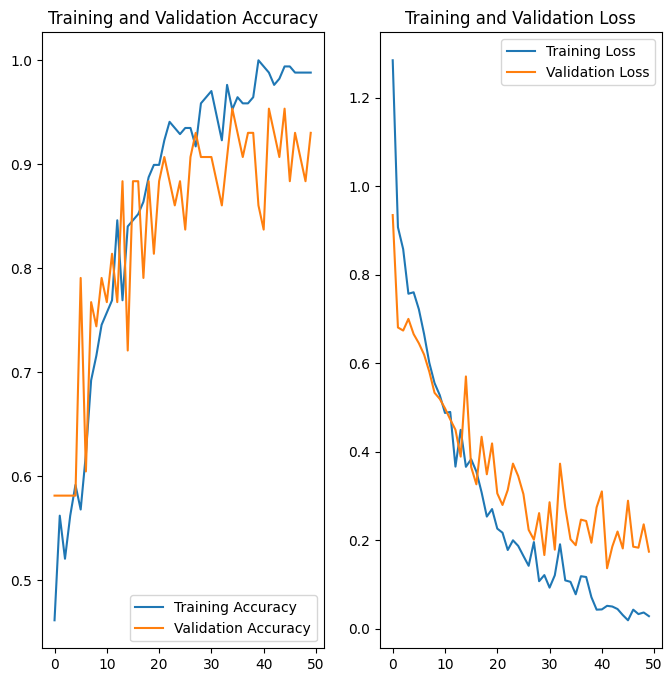

In [26]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


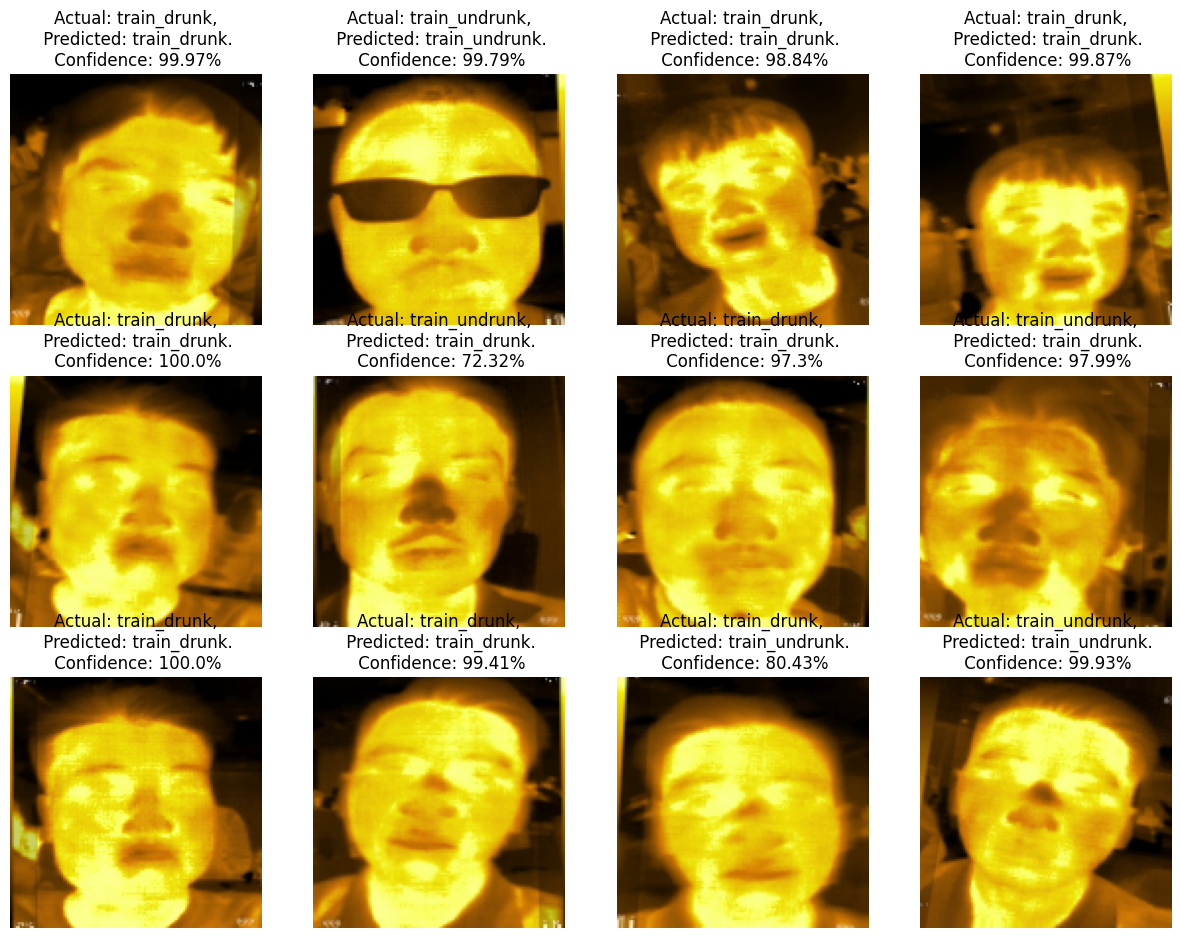

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break